SVM
Features: Energy, Dots, Edges

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
cd /content/drive/"MyDrive/Machine Learning/Edge&Line_Detection"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import glob
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()

In [ ]:
# 0 = crazing 
# 1 = inclusion
# 2 = patches
# 3 = pitted_surface
# 4 = rolled in scale
# 5 = scratches

In [ ]:
dataset = pd.read_csv('train_features_extracted.csv')

In [ ]:
dataset

,Class,Energy,Dots,Lines,contours,Edges,Corners
0,crazing,153.854106,339,2,2,12857,2
1,crazing,98.900338,288,2,2,8345,2
2,crazing,122.753619,327,2,2,10913,2
3,crazing,110.394338,379,2,2,9927,2
4,crazing,135.667513,266,2,2,11858,2
...,...,...,...,...,...,...,...
1435,scratches,9.140425,61,2,2,70,2
1436,scratches,14.365756,0,2,2,808,2
1437,scratches,9.262863,3,2,2,721,2
1438,scratches,17.461644,0,2,2,975,2


In [ ]:
x = dataset.iloc[:, [1,2,5]].values

In [ ]:
x

array([[1.53854106e+02, 3.39000000e+02, 1.28570000e+04],
       [9.89003375e+01, 2.88000000e+02, 8.34500000e+03],
       [1.22753619e+02, 3.27000000e+02, 1.09130000e+04],
       ...,
       [9.26286250e+00, 3.00000000e+00, 7.21000000e+02],
       [1.74616438e+01, 0.00000000e+00, 9.75000000e+02],
       [1.08811813e+01, 6.00000000e+00, 6.02000000e+02]])

In [ ]:
x[0]

array([  153.85410625,   339.        , 12857.        ])

In [ ]:
X_train = x 

In [ ]:
print(len(X_train))

1440


In [ ]:
for j in range(0,6):
    for i in range(0,240):
        y_train.append(j)

In [ ]:
print(y_train)
print(len(y_train))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
dataset2 = pd.read_csv('test_features_extracted.csv')

In [ ]:
x = dataset2.iloc[:, [1,2,5]].values

In [ ]:
print(x)

[[1.46419744e+02 3.14000000e+02 1.21900000e+04]
 [1.35537719e+02 2.28000000e+02 1.15250000e+04]
 [1.52394050e+02 2.91000000e+02 1.23890000e+04]
 ...
 [2.44281188e+01 1.40000000e+01 1.00100000e+03]
 [3.19947250e+01 3.00000000e+00 9.37000000e+02]
 [2.13497813e+01 7.00000000e+00 7.43000000e+02]]


In [ ]:
print(len(x))

360


In [ ]:
X_test = x

In [ ]:
for j in range(0,6):
    for i in range(0,60):
        y_test.append(j)

In [ ]:
print(len(y_test))

360


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1440, 3) (1440,)
Test set: (360, 3) (360,)


In [ ]:
nsamples, nx = X_train.shape
X_train = X_train.reshape((nsamples,nx))

In [ ]:
print(X_train.shape)

(1440, 3)


In [ ]:
nsamples, nx = X_test.shape
X_test = X_test.reshape((nsamples,nx))

In [ ]:
print(X_test.shape)

(360, 3)


In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[1.53854106e+02 3.39000000e+02 1.28570000e+04]
 [9.89003375e+01 2.88000000e+02 8.34500000e+03]
 [1.22753619e+02 3.27000000e+02 1.09130000e+04]
 ...
 [9.26286250e+00 3.00000000e+00 7.21000000e+02]
 [1.74616438e+01 0.00000000e+00 9.75000000e+02]
 [1.08811813e+01 6.00000000e+00 6.02000000e+02]]
[[1.46419744e+02 3.14000000e+02 1.21900000e+04]
 [1.35537719e+02 2.28000000e+02 1.15250000e+04]
 [1.52394050e+02 2.91000000e+02 1.23890000e+04]
 ...
 [2.44281188e+01 1.40000000e+01 1.00100000e+03]
 [3.19947250e+01 3.00000000e+00 9.37000000e+02]
 [2.13497813e+01 7.00000000e+00 7.43000000e+02]]
[0 0 0 ... 5 5 5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 

In [ ]:
import time

In [ ]:
train_begin = time.time()
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
train_end = time.time()
train_time = train_end - train_begin


time.sleep(5)
test_begin = time.time()
yhat = clf.predict(X_test)
test_end = time.time()
test_time = test_end - test_begin
print(yhat)

print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 5 3 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 5 1 1
 1 1 1 1 1 1 1 1 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 3 3 1 5 3
 3 3 1 5 3 3 1 0 3 3 3 3 5 3 1 3 3 3 3 3 1 3 1 3 3 5 5 0 5 3 5 3 3 3 3 3 0
 3 3 5 3 3 3 3 3 3 3 1 5 3 0 1 3 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 3 5 5 5 5 5 3 5 1 5 5 5 5 5 1 5 5 2 5 5 5 5 5 5 1 5 5 5 5 5
 3 5 5 5 5 5 5 5 5 3 5 5 5 3 5 5 5 5 5 5 5 5 5 1 5 5 5]
0.8777777777777778
[[58  0  2  0  0  0]
 [ 0 56  0  1  0  3]
 [ 5  0 55  0  0  0]
 [ 4  9  0 38  0  9]
 [ 0  0  0  1 59  0]
 [ 0  4  1  5  0 50]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        60
           1  

In [ ]:
print(train_time)
print(test_time/len(X_test))

149.68543887138367
1.3334883583916559e-05


In [ ]:
matrix = confusion_matrix(y_test, yhat)
matrix.diagonal()/matrix.sum(axis=1)


array([0.96666667, 0.93333333, 0.91666667, 0.63333333, 0.98333333,
       0.83333333])

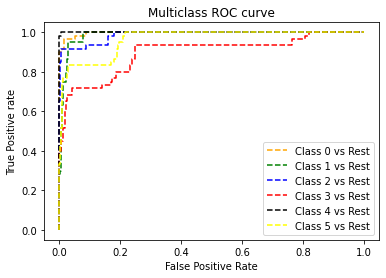

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_prob = clf.fit(X_train, y_train).decision_function(X_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)


# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [ ]:
clf = svm.SVC(kernel='rbf', gamma="scale")
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat)

print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[0 0 0 0 0 2 0 0 0 0 0 0 3 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 1 2 2 1 2 2 2 4 2 5 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 5 2 2 2 2 5 2 5 2 2 4 1 5 5
 5 2 1 1 2 5 1 2 1 1 4 0 5 2 1 2 0 2 5 2 1 5 1 2 2 1 5 0 5 2 5 0 2 3 5 4 2
 5 2 1 3 5 5 5 4 2 1 1 5 4 3 1 1 1 4 1 4 1 1 1 4 1 1 4 4 1 4 1 1 1 1 1 1 1
 1 1 1 4 1 4 1 1 1 4 4 4 1 1 4 4 4 1 1 4 1 1 4 1 4 4 1 1 1 1 4 1 1 1 1 1 4
 4 4 4 1 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 1 5 5 5 1 5 5 5 5 5 1 5 5 1 5 5
 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 1 5 1 5 5 5]
0.6666666666666666
[[53  0  6  1  0  0]
 [ 0 60  0  0  0  0]
 [ 2  2 50  0  1  5]
 [ 4 16 15  3  6 16]
 [ 0 38  0  0 22  0]
 [ 0  8  0  0  0 52]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        60
           1  

In [ ]:
clf = svm.SVC(kernel='rbf', gamma="auto")
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat)

print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 3 1 3 3 1 1 3 1 3 1
 3 1 3 0 3 1 0 1 0 1 5 3 1 1 1 1 0 5 1 1 3 3 1 0 0 0 1 1 1 3 1 5 3 3 0 0 1
 1 1 1 1 1 1 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
0.2833333333333333
[[60  0  0  0  0  0]
 [11 29  0 17  0  3]
 [60  0  0  0  0  0]
 [54  0  0  5  0  1]
 [57  0  0  0  3  0]
 [55  0  0  0  0  5]]
              precision    recall  f1-score   support

           0       0.20      1.00      0.34        60
           1  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
poly_svc = svm.SVC(kernel='poly', degree=5).fit(X_train, y_train)
yhat = poly_svc.predict(X_test)
print(yhat)
print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[0 0 0 0 0 0 0 0 0 2 0 2 4 0 0 0 0 0 2 2 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 0 2 3 2 2 2 2 2 1 2 3 2 3 2 2 1 2 2 1 2 2 2 1 2 1 2 2
 2 2 2 2 2 2 2 3 0 2 3 2 2 3 3 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 3 0 5 1 1 1
 1 2 1 1 2 1 1 0 1 1 1 3 1 2 1 0 4 2 1 2 1 1 1 2 3 1 1 3 1 3 1 3 0 5 1 1 3
 1 3 1 4 1 1 1 1 2 1 1 1 5 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.4388888888888889
[[48  0  9  2  1  0]
 [ 0 60  0  0  0  0]
 [ 2  8 42  8  0  0]
 [ 4 36  7  7  3  3]
 [ 0 60  0  0  0  0]
 [ 0 59  0  0  0  1]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        60
           1  

In [ ]:
for i in range(1,8) :
    poly_svc = svm.SVC(kernel='poly', degree=i).fit(X_train, y_train)
    yhat = poly_svc.predict(X_test)
    print(yhat)
    print('Degree = ',i, metrics.accuracy_score(y_test, yhat))
    # print(confusion_matrix(y_test, yhat))
    # print(classification_report(y_test, yhat))

[0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 0 2 2 2 2 2 0 2 1 0 2 2 2 2 2 1 2 2 1 2 0 2 4 2 5 0 0
 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 4 2 2 2 2 5 2 5 2 2 3 1 5 5
 5 2 1 1 2 5 1 2 1 1 5 3 5 2 1 0 3 0 5 0 1 5 1 2 2 1 5 3 1 2 5 2 0 3 3 3 2
 5 2 1 3 5 5 5 4 2 1 1 5 3 3 1 1 1 3 1 4 1 1 1 5 1 1 4 4 1 5 1 1 1 1 1 1 1
 1 1 1 4 1 4 1 1 1 5 4 4 1 1 1 5 4 1 1 1 1 1 4 1 1 5 1 1 1 1 1 1 1 1 1 1 1
 4 4 5 1 5 5 5 5 5 5 5 5 5 5 1 1 5 1 5 3 5 1 5 5 5 1 5 5 5 5 5 1 5 1 1 5 5
 5 5 5 5 5 5 5 5 1 5 5 5 5 1 5 5 1 5 5 5 5 1 5 1 5 5 5]
Degree =  1 0.6194444444444445
[0 0 0 0 0 0 0 0 0 2 0 0 3 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 

In [ ]:
poly_svc = svm.SVC(kernel='poly', degree=1).fit(X_train, y_train)
yhat = poly_svc.predict(X_test)
print(yhat)
print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 0 2 2 2 2 2 0 2 1 0 2 2 2 2 2 1 2 2 1 2 0 2 4 2 5 0 0
 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 4 2 2 2 2 5 2 5 2 2 3 1 5 5
 5 2 1 1 2 5 1 2 1 1 5 3 5 2 1 0 3 0 5 0 1 5 1 2 2 1 5 3 1 2 5 2 0 3 3 3 2
 5 2 1 3 5 5 5 4 2 1 1 5 3 3 1 1 1 3 1 4 1 1 1 5 1 1 4 4 1 5 1 1 1 1 1 1 1
 1 1 1 4 1 4 1 1 1 5 4 4 1 1 1 5 4 1 1 1 1 1 4 1 1 5 1 1 1 1 1 1 1 1 1 1 1
 4 4 5 1 5 5 5 5 5 5 5 5 5 5 1 1 5 1 5 3 5 1 5 5 5 1 5 5 5 5 5 1 5 1 1 5 5
 5 5 5 5 5 5 5 5 1 5 5 5 5 1 5 5 1 5 5 5 5 1 5 1 5 5 5]
0.6194444444444445
[[55  0  4  1  0  0]
 [ 0 60  0  0  0  0]
 [12  3 40  0  2  3]
 [ 4 17 12 11  1 15]
 [ 0 43  0  0 11  6]
 [ 0 13  0  1  0 46]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        60
           1  